In [107]:
# author: Suhas Vittal

In [108]:
from utils import *

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [152]:
C1 = '#1f4529'
C2 = '#f5f4b3'
C3 = '#abba7c'
C4 = '#898121'

In [153]:
########### DISAGGREGATED MEMORY HIERARCHY #################

C_DATA_FOLDER = '../out/dms/compiled_results'
S_DATA_FOLDER = '../out/dms/simulation_results'
PLOTS = 'plots/dms'

BENCHMARKS = ['shor_rsa256', 'grover_3sat_1710', 'cr2_120', 'c2h4o_ethylene_oxide_240', 'hc3h2cn_288']
TICKS = ['shor_rsa256', 'grover_3sat', 'chromium', 'ethylene', 'hc2h2cn']

TICKS_WITH_GMEAN = [*TICKS, 'gmean']
TICKS_WITH_MEAN = [*TICKS, 'mean']

BENCHMARK_X = np.arange(len(BENCHMARKS))
BENCHMARK_X_WITH_MEAN = np.arange(len(BENCHMARKS)+1)

def plot_absolute_stat(ax,
                        configs: list[dict],
                        colors: list[str],
                        legend: list[str],
                        stat_key: str,
                        ylabel: str,
                        legend_ncols=1
):
    ax.set_ylabel(ylabel, fontsize=12)

    width = 1.0 / (len(configs)+1)
    offset = 0

    for (i,cd) in enumerate(configs):
        Y = []
        for b in BENCHMARKS:
            cx = cd[b][stat_key]
            Y.append(cx)
        Y.append(sum(Y)/len(Y))
        Y = np.array(Y)

        print(legend[i], Y[-1], max(Y))
        
        ax.bar(BENCHMARK_X_WITH_MEAN+offset, Y, width, color=colors[i], edgecolor='k', zorder=3, label=legend[i])
        offset += width

    workload_x_ticks = BENCHMARK_X_WITH_MEAN + (len(configs)-1)/2 * width
    ax.set_xticks(workload_x_ticks, TICKS_WITH_MEAN, rotation=30, ha='right', fontsize=10)
    ax.grid(visible=True, axis='y', zorder=0)
    if len(configs) > 1:
        ax.legend(fontsize=10, ncols=legend_ncols)

def plot_relative_stat(ax, 
                        baseline,
                        configs: list[dict],
                        colors: list[str],
                        legend: list[str],
                        stat_key: str,
                        ylabel: str,
                        legend_ncols=1,
                        plot_as_percentage=False,
                        baseline_on_top=True
):
    ax.set_ylabel(ylabel, fontsize=12)

    width = 1.0 / (len(configs)+1)
    offset = 0

    for (i,cd) in enumerate(configs):
        Y = []
        for b in BENCHMARKS:
            if type(baseline) is list:
                bx = baseline[i][b][stat_key]
            else:
                bx = baseline[b][stat_key]
            cx = cd[b][stat_key]
            if baseline_on_top:
                Y.append(bx/cx)
            else:
                Y.append(cx/bx)
        gm = sp.stats.gmean(Y)
        Y.append(gm)
        Y = np.array(Y)

        print(legend[i], Y[-1], max(Y))

        if plot_as_percentage:
            Y = (Y-1)*100
        ax.bar(BENCHMARK_X_WITH_MEAN+offset, Y, width, color=colors[i], edgecolor='k', zorder=3, label=legend[i])
        offset += width

    workload_x_ticks = BENCHMARK_X_WITH_MEAN + (len(configs)-1)/2 * width
    ax.set_xticks(workload_x_ticks, TICKS_WITH_GMEAN, rotation=30, ha='right', fontsize=10)
    ax.grid(visible=True, axis='y', zorder=0)
    if len(configs) > 1:
        ax.legend(fontsize=10, ncols=legend_ncols)
        
# common data:
c_viszlai = get_compiler_policy_results('viszlai', C_DATA_FOLDER)
c_hint = get_compiler_policy_results('hint', C_DATA_FOLDER)

s_baseline  = get_simulation_policy_results('baseline', S_DATA_FOLDER)
s_viszlai = get_simulation_policy_results('viszlai', S_DATA_FOLDER)
s_hint = get_simulation_policy_results('hint', S_DATA_FOLDER)
s_hint_c = get_simulation_policy_results('hint_c', S_DATA_FOLDER)

EIF 13.038183055395628 30.892708743384507
--
EIF 13.038183055395628 30.892708743384507
HINT 2.962517909555562 13.758403907584874
--
EIF 13.038183055395628 30.892708743384507
HINT 2.962517909555562 13.758403907584874
HINT-C 2.7550717859516074 11.318433392707313
--
HINT-C 1.0752960865345667 1.2155749325211103


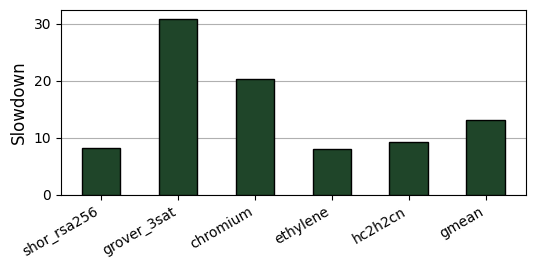

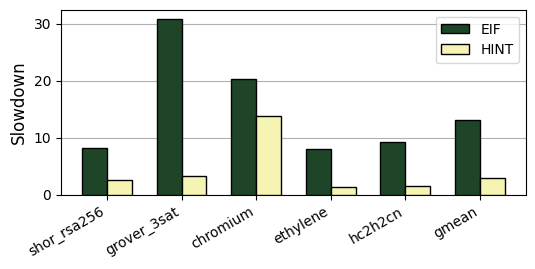

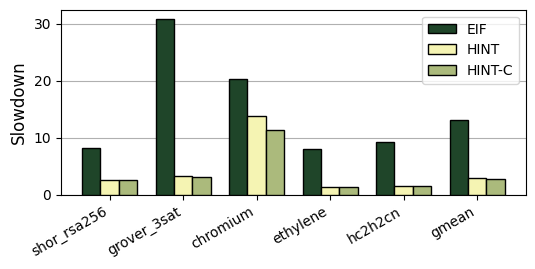

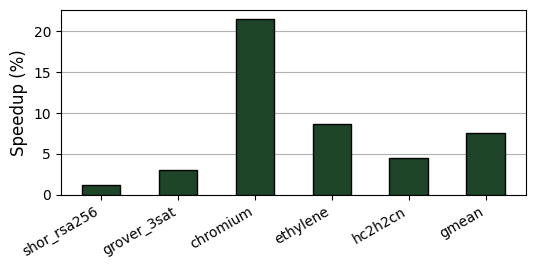

In [154]:
## plot slowdown

s_baseline_c12 = filter_policy_by_suffix(s_baseline, 'c12_100M')
s_viszlai_c12 = filter_policy_by_suffix(s_viszlai, 'c12_100M')
s_hint_c12 = filter_policy_by_suffix(s_hint, 'c12_100M')
s_hint_c_c12 = filter_policy_by_suffix(s_hint_c, 'c12_100M')

### first, EIF only --
fig, ax = plt.subplots()
fig.set_size_inches(6.0,2.4)

plot_relative_stat(ax, s_baseline_c12,
                    [s_viszlai_c12],
                    [C1],
                    ['EIF'],
                    'kips',
                    'Slowdown')
plt.savefig(f'{PLOTS}/eif_slowdown.pdf', bbox_inches='tight')


print('--')

### second, EIF and HINT --
fig, ax = plt.subplots()
fig.set_size_inches(6.0,2.4)

plot_relative_stat(ax, s_baseline_c12,
                    [s_viszlai_c12, s_hint_c12],
                    [C1, C2],
                    ['EIF', 'HINT'],
                    'kips',
                    'Slowdown')
plt.savefig(f'{PLOTS}/hint_slowdown.pdf', bbox_inches='tight')

print('--')

### finally, EIF and HINT and HINT-C --

fig, ax = plt.subplots()
fig.set_size_inches(6.0,2.4)

plot_relative_stat(ax, s_baseline_c12,
                    [s_viszlai_c12, s_hint_c12, s_hint_c_c12],
                    [C1, C2, C3],
                    ['EIF', 'HINT', 'HINT-C'],
                    'kips',
                    'Slowdown')
plt.savefig(f'{PLOTS}/hint_c_slowdown.pdf', bbox_inches='tight')


print('--')

### HINT-C Speedup:
fig, ax = plt.subplots()
fig.set_size_inches(6.0,2.4)

plot_relative_stat(ax, s_hint_c12,
                    [s_hint_c_c12],
                    [C1, C2, C3],
                    ['HINT-C'],
                    'kips',
                    'Speedup (%)',
                    plot_as_percentage=True, baseline_on_top=False)
plt.savefig(f'{PLOTS}/hint_c_speedup.pdf', bbox_inches='tight')

C = 8------------
EIF 13.375690181112793 28.777499341740892
HINT 3.8286483798147724 19.53626566967231
---
EIF 13.375690181112793 28.777499341740892
HINT 3.8286483798147724 19.53626566967231
HINT-C 3.6097649552973254 16.04862749632349
---
HINT-C 1.0606364755678166 1.217316912249835
---
C = 16------------
EIF 12.038621400893392 30.713237908961595
HINT 2.4377828967532937 7.928740076801767
---
EIF 12.038621400893392 30.713237908961595
HINT 2.4377828967532937 7.928740076801767
HINT-C 2.2584935797557635 6.180276408083895
---
HINT-C 1.0793844705181403 1.2829102702317416
---


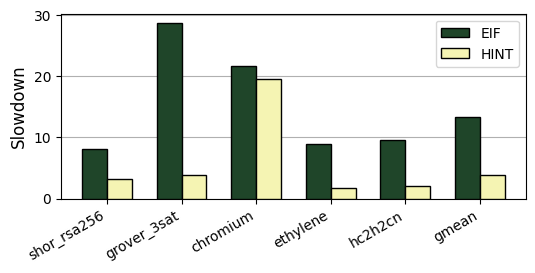

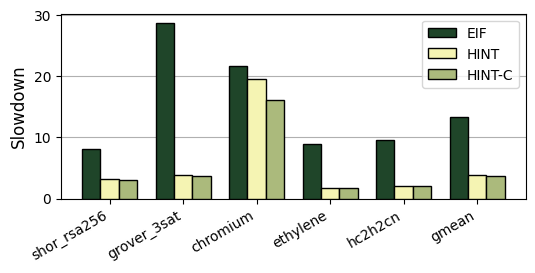

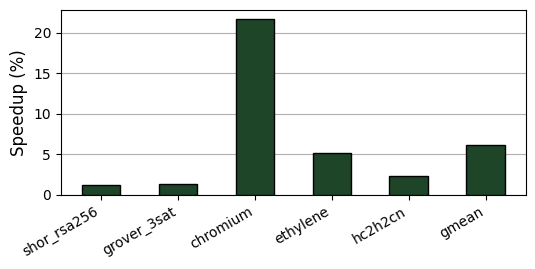

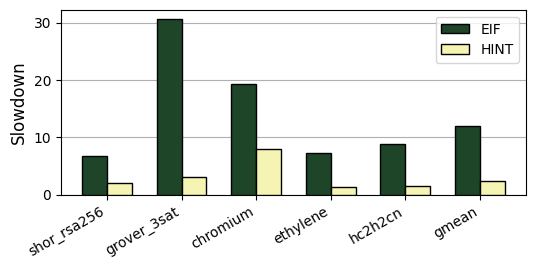

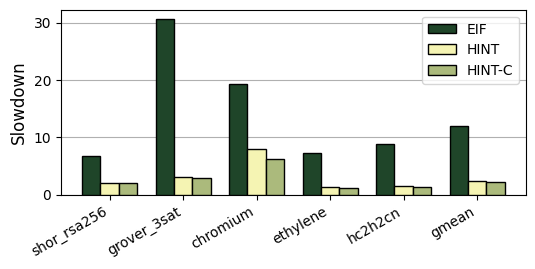

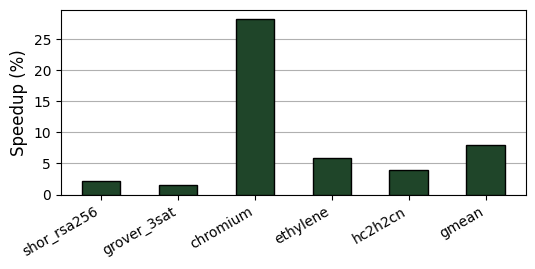

In [155]:
## compute capacty sensitivity

'''
baselines = []
configs = []
for c in [8, 12, 16]:
    if c == 12:
        baselines.append(s_baseline_c12)
        configs.append(s_hint_c12)
        continue
    baselines.append(filter_policy_by_suffix(s_baseline, f'c{c}_10M'))
    configs.append(filter_policy_by_suffix(s_hint, f'c{c}_10M'))

plot_relative_stat(ax, baselines,
                    configs,
                    [C1,C2,C3],
                    ['8 qubits', '12* qubits', '16 qubits'],
                    'kips',
                    'Slowdown')
'''

for c in [8, 16]:
    print(f'C = {c}------------')
    
    fig, ax = plt.subplots()
    fig.set_size_inches(6.0,2.4)

    s_baseline_cx = filter_policy_by_suffix(s_baseline, f'c{c}_100M')
    s_viszlai_cx = filter_policy_by_suffix(s_viszlai, f'c{c}_100M')
    s_hint_cx = filter_policy_by_suffix(s_hint, f'c{c}_100M')
    s_hint_c_cx = filter_policy_by_suffix(s_hint_c, f'c{c}_100M')

    plot_relative_stat(ax, s_baseline_cx,
                    [s_viszlai_cx, s_hint_cx],
                    [C1,C2],
                    ['EIF', 'HINT'],
                    'kips',
                    'Slowdown')
    plt.savefig(f'{PLOTS}/hint_slowdown_c{c}.pdf', bbox_inches='tight')

    print('---')
    
    fig, ax = plt.subplots()
    fig.set_size_inches(6.0,2.4)

    plot_relative_stat(ax, s_baseline_cx,
                    [s_viszlai_cx, s_hint_cx, s_hint_c_cx],
                    [C1,C2,C3],
                    ['EIF', 'HINT', 'HINT-C'],
                    'kips',
                    'Slowdown')
    plt.savefig(f'{PLOTS}/hint_c_slowdown_c{c}.pdf', bbox_inches='tight')

    print('---')
    
    fig, ax = plt.subplots()
    fig.set_size_inches(6.0,2.4)
    
    plot_relative_stat(ax, s_hint_cx,
                        [s_hint_c_cx],
                        [C1, C2, C3],
                        ['HINT-C'],
                        'kips',
                        'Speedup (%)',
                        plot_as_percentage=True, baseline_on_top=False)
    plt.savefig(f'{PLOTS}/hint_c_speedup_c{c}.pdf', bbox_inches='tight')
    
    print('---')

EIF 118.87567460400001 191.94051766
HINT 621.9023155560001 874.48947349


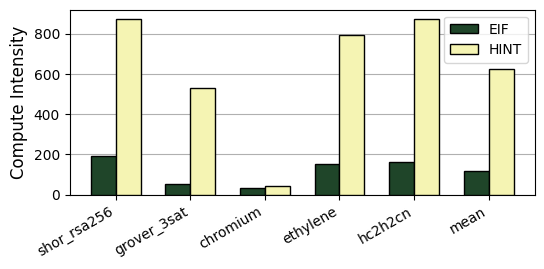

In [156]:
## plot compute intensity
fig, ax = plt.subplots()
fig.set_size_inches(6.0,2.4)

c_viszlai_c12 = filter_policy_by_suffix(c_viszlai, 'c12_100M')
c_hint_c12 = filter_policy_by_suffix(c_hint, 'c12_100M')

plot_absolute_stat(ax, 
                    [c_viszlai_c12, c_hint_c12],
                    [C1, C2],
                    ['EIF', 'HINT'],
                    'compute_intensity',
                    'Compute Intensity')
plt.savefig(f'{PLOTS}/compute_intensity.pdf', bbox_inches='tight')

8 qubits 3.736515563512173 8.462477980659715
12* qubits 4.313338412004072 9.838204997800469
16 qubits 5.012331567879622 10.328152754173903


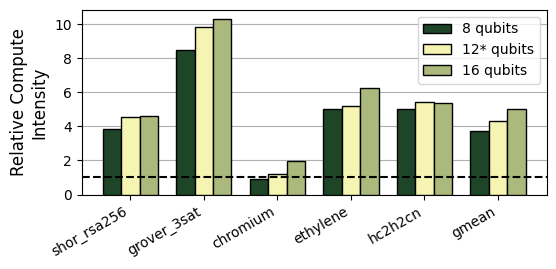

In [157]:
## plot compute intensity different qubit counts
fig, ax = plt.subplots()
fig.set_size_inches(6.0, 2.4)

baselines, configs = [], []
for c in [8, 12, 16]:
    baselines.append(filter_policy_by_suffix(c_viszlai, f'c{c}_100M'))
    configs.append(filter_policy_by_suffix(c_hint, f'c{c}_100M'))

plot_relative_stat(ax,
                   baselines,
                   configs,
                   [C1,C2,C3],
                   ['8 qubits', '12* qubits', '16 qubits'],
                   'compute_intensity',
                   'Relative Compute\nIntensity',
                   baseline_on_top=False)
ax.axhline(y=1, linestyle='--', color='k', zorder=3)

EIF 1608.169655 5814.202735
HINT 416.047591 1436.115602
883673.8 131683.6


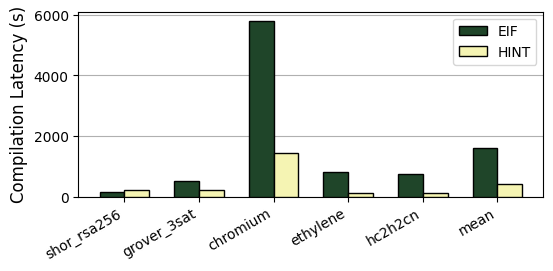

In [158]:
## plot compilation time
fig, ax = plt.subplots()
fig.set_size_inches(6.0, 2.4)

plot_absolute_stat(ax,
                    [c_viszlai_c12, c_hint_c12],
                    [C1, C2],
                    ['EIF', 'HINT'],
                    'compile_time',
                    'Compilation Latency (s)')
plt.savefig(f'{PLOTS}/compilation_latency.pdf', bbox_inches='tight')

# compare mean emissin calls (scheduling epochs)
Y_EIF, Y_HINT = [], []
for b in BENCHMARKS:
    Y_EIF.append(c_viszlai_c12[b]['emission_calls'])
    Y_HINT.append(c_hint_c12[b]['emission_calls'])
Y_EIF.append(sum(Y_EIF)/len(Y_EIF))
Y_HINT.append(sum(Y_HINT)/len(Y_HINT))
print(Y_EIF[-1], Y_HINT[-1])

HINT 32.62194566343631 75.02918341417445


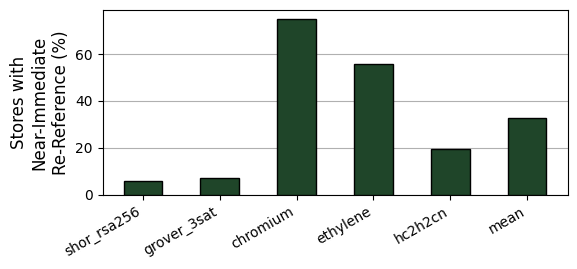

In [159]:
## plot re-reference
fig, ax = plt.subplots()
fig.set_size_inches(6.0, 2.4)

# create near reference percentage key:
for b in BENCHMARKS:
    c_hint_c12[b]['near_rref_page'] = 100*c_hint_c12[b]['near_immediate_rref'] / c_hint_c12[b]['memory_instructions']

plot_absolute_stat(ax,
                    [c_hint_c12],
                    [C1],
                    ['HINT'],
                    'near_rref_page',
                    'Stores with\nNear-Immediate\nRe-Reference (%)')
plt.savefig(f'{PLOTS}/near_rereference.pdf', bbox_inches='tight')

78.81209404030615 21.187905959693857


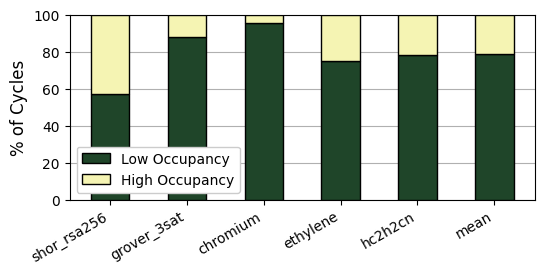

In [160]:
## plot epr buffer occu
# custom plot
fig, ax = plt.subplots()
fig.set_size_inches(6.0, 2.4)

ax.set_ylabel('% of Cycles', fontsize=12)

Y_low = []
Y_high = []

for b in BENCHMARKS:
    epr_hist = s_hint_c12[b]['epr_buffer_histogram']
    # compute min and max size of histogram
    min_size = 100000000
    max_size = 0
    for k in epr_hist.keys():
        split_k = k.split('_')
        min_size = min(min_size, int(split_k[0]))
        max_size = max(max_size, int(split_k[1]))
    num_bins = 8
    bin_size = max(1, (max_size-min_size) / 8)

    # now get lwo occupancy (<50%) and high occupancy (>50%)
    low_occu, high_occu = 0, 0
    for b in range(0, max_size//2):
        k = f'{b}_{b+1}'
        low_occu += epr_hist[k]
    for b in range(max_size//2, max_size):
        k = f'{b}_{b+1}'
        high_occu += epr_hist[k]
    lof = low_occu / (low_occu + high_occu)
    hof = high_occu / (low_occu + high_occu)
    Y_low.append(lof)
    Y_high.append(hof)

Y_low.append(sum(Y_low)/len(Y_low))
Y_high.append(sum(Y_high)/len(Y_high))
Y_low = np.array(Y_low) * 100
Y_high = np.array(Y_high) * 100

print(Y_low[-1], Y_high[-1])

ax.bar(BENCHMARK_X_WITH_MEAN, Y_low, 0.5, label='Low Occupancy', color=C1, edgecolor='k', zorder=3)
ax.bar(BENCHMARK_X_WITH_MEAN, Y_high, bottom=Y_low, width=0.5, label='High Occupancy', color=C2, edgecolor='k', zorder=3)

workload_x_ticks = BENCHMARK_X_WITH_MEAN
ax.set_xticks(workload_x_ticks, TICKS_WITH_MEAN, rotation=30, ha='right', fontsize=10)
ax.grid(visible=True, axis='y', zorder=0)
ax.set_ylim([0,100])
ax.legend(fontsize=10, framealpha=1.0)

plt.savefig(f'{PLOTS}/epr_occupancy.pdf', bbox_inches='tight')

EIF 3.571758 3.57198
HINT 3.5718760000000005 3.5722199999999997
HINT-C 3.078456 3.49944


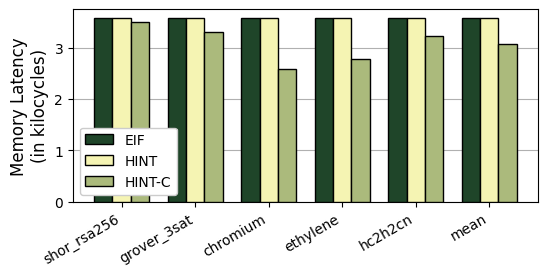

In [161]:
## memory access latency:
fig, ax = plt.subplots()
fig.set_size_inches(6.0, 2.5)

for d in [s_viszlai_c12, s_hint_c12, s_hint_c_c12]:
    for b in BENCHMARKS:
        d[b]['mean_mem_access_latency_kilo'] = d[b]['mean_mem_access_latency']/1000

plot_absolute_stat(ax,
                    [s_viszlai_c12, s_hint_c12, s_hint_c_c12],
                    [C1,C2,C3],
                    ['EIF', 'HINT', 'HINT-C'],
                    'mean_mem_access_latency_kilo',
                    'Memory Latency\n(in kilocycles)')
ax.legend(loc='lower left', framealpha=1.0)
plt.savefig(f'{PLOTS}/memory_access_latency.pdf', bbox_inches='tight')

67.32932602183122 21.68561260724259 10.985061370926175


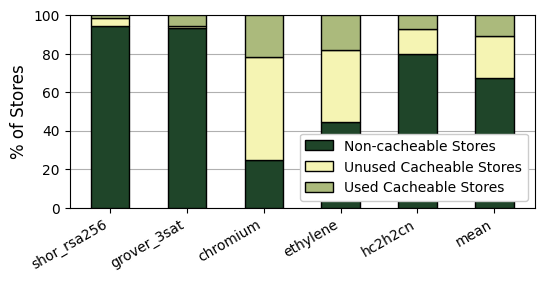

In [162]:
## store breakdown
fig, ax  = plt.subplots()
fig.set_size_inches(6.0, 2.5)

ax.set_ylabel('% of Stores', fontsize=12)

Y_not_cache = []
Y_cache_not_used = []
Y_cache_used = []

for b in BENCHMARKS:
    total_stores = s_hint_c_c12[b]['memory_swaps']
    total_cacheable_stores = s_hint_c_c12[b]['cacheable_memory_swaps']
    cacheable_stores_used = s_hint_c_c12[b]['cached_stores']
    
    noncacheable_stores = total_stores - total_cacheable_stores
    cacheable_stores_not_used = total_cacheable_stores - cacheable_stores_used
    
    Y_not_cache.append(noncacheable_stores / total_stores)
    Y_cache_not_used.append(cacheable_stores_not_used / total_stores)
    Y_cache_used.append(cacheable_stores_used / total_stores)

Y_not_cache.append(sum(Y_not_cache)/len(Y_not_cache))
Y_cache_not_used.append(sum(Y_cache_not_used)/len(Y_cache_not_used))
Y_cache_used.append(sum(Y_cache_used)/len(Y_cache_used))

Y_not_cache = np.array(Y_not_cache) * 100
Y_cache_not_used = np.array(Y_cache_not_used) * 100
Y_cache_used = np.array(Y_cache_used) * 100

print(Y_not_cache[-1], Y_cache_not_used[-1], Y_cache_used[-1])

ax.bar(BENCHMARK_X_WITH_MEAN, Y_not_cache, 0.5, label='Non-cacheable Stores', color=C1, edgecolor='k', zorder=3)
ax.bar(BENCHMARK_X_WITH_MEAN, Y_cache_not_used, bottom=Y_not_cache, width=0.5,\
            label='Unused Cacheable Stores', color=C2, edgecolor='k', zorder=3)
ax.bar(BENCHMARK_X_WITH_MEAN, Y_cache_used, bottom=Y_not_cache+Y_cache_not_used, width=0.5,\
            label='Used Cacheable Stores', color=C3, edgecolor='k', zorder=3)


workload_x_ticks = BENCHMARK_X_WITH_MEAN
ax.set_xticks(workload_x_ticks, TICKS_WITH_MEAN, rotation=30, ha='right', fontsize=10)
ax.grid(visible=True, axis='y', zorder=0)
ax.set_ylim([0,100])
ax.legend(fontsize=10, framealpha=1.0, loc='lower right')

plt.savefig(f'{PLOTS}/cacheable_stores.pdf', bbox_inches='tight')

4-Entry 3.079942511738411 14.009130678702226
8-Entry* 2.7550717859516074 11.318433392707313
16-Entry 2.5339395513792375 9.036643903153076
32-Entry 2.3010971744781994 5.927882691846043


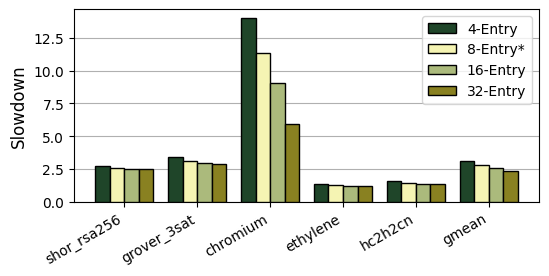

In [163]:
## different EPR buffer capacities

fig, ax = plt.subplots()
fig.set_size_inches(6.0,2.5)

configs = []
for e in [4, 8, 16, 32]:
    if e == 8:
        s_hint_c_x = get_simulation_policy_results('hint_c', S_DATA_FOLDER)
    else:
        s_hint_c_x = get_simulation_policy_results(f'hint_c_epr{e}', S_DATA_FOLDER)
    configs.append(filter_policy_by_suffix(s_hint_c_x, 'c12_100M'))

plot_relative_stat(ax, s_baseline_c12,
                    configs,
                    [C1,C2,C3,C4],
                    ['4-Entry', '8-Entry*', '16-Entry', '32-Entry'],
                    'kips',
                    'Slowdown')
plt.savefig(f'{PLOTS}/hint_c_epr_buffer_sensitivity.pdf', bbox_inches='tight')